# Streak simultaneous measurement 

Laser on the streak, splitted to the photodiode

In [1]:
%run ../../PhD-utils/AWAKE-toolbox.py

import matplotlib.pyplot as plt
%matplotlib inline

import glob

Version 0.1
Please report bugs to eugenio.senes@cern.ch
Use at your own risk.


In [12]:
scopePath = './Photodiode-on-Tek/1ns-lq-big'
imPath = './LaserOnStreak+photodiode/Gain40_slit20um_1ns_bigger_scale'

In [3]:
# Init the dataframe
data = pnd.DataFrame([],columns=['scope_t','scope_V','scope_t_sampling'])

# Scope traces

## Load

In [13]:
scopePathList = sorted(glob.glob(scopePath+'/*.csv'))

In [34]:
for lab in scopePathList:
    data.loc[lab] = load_data_Tektronix(lab)

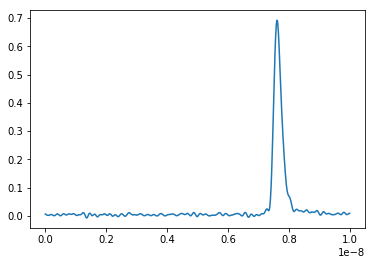

In [36]:
ll = 55
plt.plot(data["scope_t"].iloc[ll], data["scope_V"].iloc[ll],'-')

## FFT

In [37]:
# add columns to dataframe
data['scope_f'] = [np.empty(0,dtype=float)]*len(data)
data['scope_dB'] = [np.empty(0,dtype=float)]*len(data)

In [38]:
# do the fft
for k in data.index:
    data["scope_f"].loc[k], data["scope_dB"].loc[k]  = doFFT(data["scope_t"].loc[k], data["scope_V"].loc[k])

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


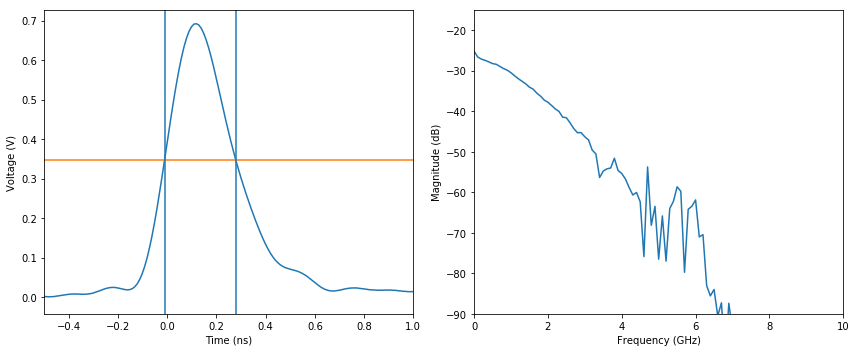

In [56]:
ll = 55

delay_offset = 7.5 #ns

fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0].plot(1e9*data["scope_t"].iloc[ll]-delay_offset, data["scope_V"].iloc[ll],'-')
ax[0].set_xlabel('Time (ns)')
ax[0].set_ylabel('Voltage (V)')
ax[0].set_xlim(-0.5, 1)
ax[0].plot([-1,1],[np.max(data["scope_V"].iloc[ll])/2., np.max(data["scope_V"].iloc[ll])/2.],'-')
ax[0].axvline(x=-0.01)
ax[0].axvline(x=0.28)


ax[1].plot(1e-9*data["scope_f"].iloc[ll], dB(data["scope_dB"].iloc[ll]),'-')
ax[1].set_xlabel('Frequency (GHz)')
ax[1].set_ylabel('Magnitude (dB)')
ax[1].set_xlim(0,10)
ax[1].set_ylim(-90,-15)

plt.tight_layout()

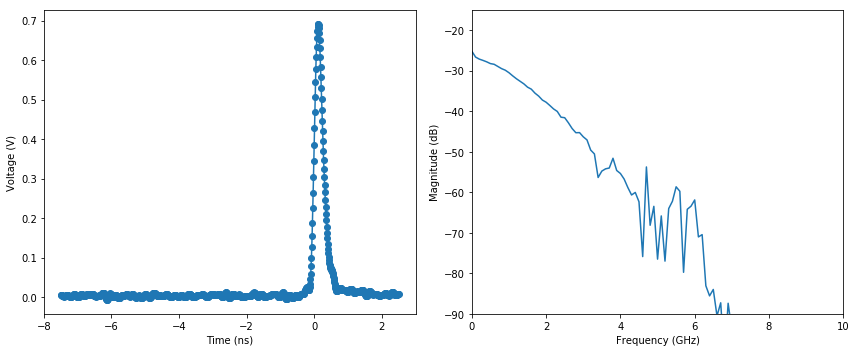

In [62]:
ll = 55

delay_offset = 7.5 #ns

fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0].plot(1e9*data["scope_t"].iloc[ll]-delay_offset, data["scope_V"].iloc[ll],'-o')
ax[0].set_xlabel('Time (ns)')
ax[0].set_ylabel('Voltage (V)')
# ax[0].set_xlim(-0.5, 1)
# ax[0].plot([-1,1],[np.max(data["scope_V"].iloc[ll])/2., np.max(data["scope_V"].iloc[ll])/2.],'-')
# ax[0].axvline(x=-0.01)
# ax[0].axvline(x=0.28)


ax[1].plot(1e-9*data["scope_f"].iloc[ll], dB(data["scope_dB"].iloc[ll]),'-')
ax[1].set_xlabel('Frequency (GHz)')
ax[1].set_ylabel('Magnitude (dB)')
ax[1].set_xlim(0,10)
ax[1].set_ylim(-90,-15)

plt.tight_layout()

In [59]:
data.head()

,scope_t,scope_V,scope_t_sampling,scope_f,scope_dB
./Photodiode-on-Tek/1ns-lq-big/Tek003_ch1_20190624110054357.csv,"[8.75e-12, 1.875e-11, 2.875e-11, 3.875e-11, 4....","[-0.004234375, -0.00459375, -0.00396875, -0.00...",1.000000e-11,"[-50000000000.0, -49900000000.0, -49800000000....","[0.000255281219999997, 1.9833659871949628e-05,..."
./Photodiode-on-Tek/1ns-lq-big/Tek003_ch1_20190624110055363.csv,"[8.75e-12, 1.875e-11, 2.875e-11, 3.875e-11, 4....","[0.004671875, 0.004015625, 0.003921875, 0.0031...",1.000000e-11,"[-50000000000.0, -49900000000.0, -49800000000....","[0.00025674950000000154, 1.8630782332569518e-0..."
./Photodiode-on-Tek/1ns-lq-big/Tek003_ch1_20190624110056367.csv,"[8.75e-12, 1.875e-11, 2.875e-11, 3.875e-11, 4....","[0.001015625, -0.00021875, -0.000578125, -0.00...",1.000000e-11,"[-50000000000.0, -49900000000.0, -49800000000....","[0.00027884376, 3.360452830090816e-06, 3.11180..."
./Photodiode-on-Tek/1ns-lq-big/Tek003_ch1_20190624110057370.csv,"[8.75e-12, 1.875e-11, 2.875e-11, 3.875e-11, 4....","[0.000453125, -0.000359375, -0.000515625, -0.0...",1.000000e-11,"[-50000000000.0, -49900000000.0, -49800000000....","[0.00027775001000000056, 6.305497745527353e-06..."
./Photodiode-on-Tek/1ns-lq-big/Tek003_ch1_20190624110058370.csv,"[8.75e-12, 1.875e-11, 2.875e-11, 3.875e-11, 4....","[0.00365625, 0.0035, 0.00409375, 0.004234375, ...",1.000000e-11,"[-50000000000.0, -49900000000.0, -49800000000....","[0.00025962506999999846, 1.9543961440033072e-0..."
